# Plotting Tools

In [1]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from IPython.display import Image 

## Plotting Train and validation curves

Displaying result from data/train_val/halfcheetah


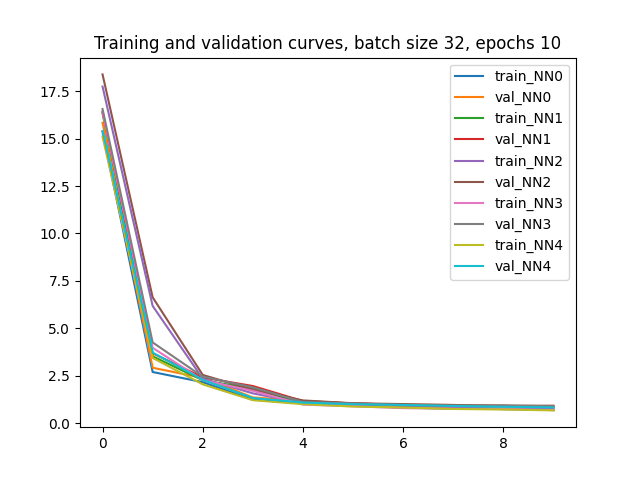

Displaying result from data/train_val/safety


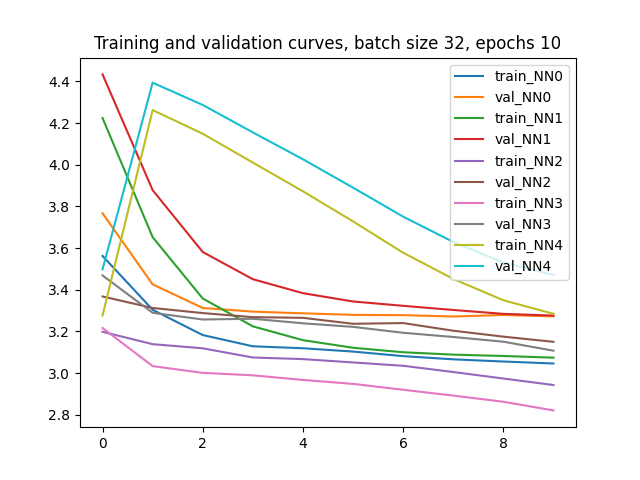

In [2]:
dir = "data/train_val/"
plot_filename = "train_vs_val.png"
for root, dirs, files in os.walk(dir):
    if plot_filename in files:
        print(f"Displaying result from {root}")
        im = Image(filename=os.path.join(root, plot_filename))
        display(im)

## Other agents

99 episodes, each 1000 long


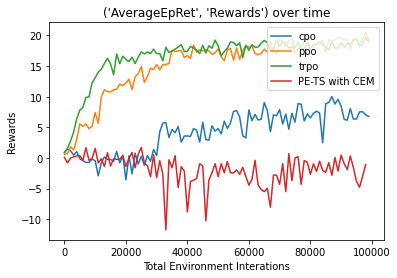

99 episodes, each 1000 long


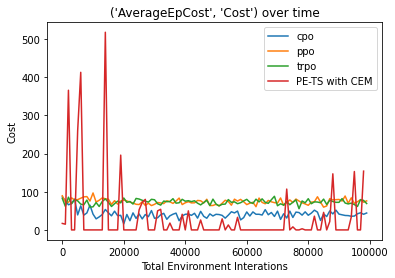

In [81]:
# Plot the Safety start agent results
import pandas as pd
from IPython.display import display

root = '/home/juliewang_jsw/handful-of-trials/data/'
filenames = {'cpo': '2020-06-07_cpo_PointSafety/2020-06-07_13-16-01-cpo_PointSafety_s0', 
'ppo': '2020-06-07_ppo_PointSafety/2020-06-07_07-11-29-ppo_PointSafety_s0', 
'trpo': '2020-06-07_trpo_PointSafety/2020-06-07_00-47-19-trpo_PointSafety_s0'}
item = [('AverageEpRet', 'Rewards'), ('AverageEpCost', 'Cost')]
for i in item:
    for algo in filenames:
        filename = filenames[algo]
        exp_data = pd.read_table(os.path.join(root, 'other_agents', filename, 'progress.txt'))
        reward = exp_data[i[0]]
        assert(np.all(ep_len == 1000))
        t = [x for x in range(0, int(len(exp_data)*ep_len[0]), int(ep_len[0]))]
        plt.plot(t, reward, label=algo)

    # plot the PE-TS CEM performance and SafeOpt Performance
    filename = 'cem_pointgoal_2020-06-11--04:05:57/logs.mat'
    data = loadmat(os.path.join(root, filename))
    N, task_horizon = data[i[1].lower()].shape
    print(f"{N} episodes, each {task_horizon} long")
    t = np.array([x for x in range(0, N*task_horizon, task_horizon)])
    d = np.sum(data[i[1].lower()], axis=1)
    plt.plot(t, d, label='PE-TS with CEM')

    # plot the SafeOpt performance
    plt.xlabel('Total Environment Interations')
    plt.ylabel(i[1])
    plt.legend(loc='upper right')
    plt.title(f'{i[1]} over time')
    plt.show()

## Visualizing reward in a single episode
Ideally, should see that later episodes have overall higher reward curves than early episodes.


99 episodes,  each 1000 long


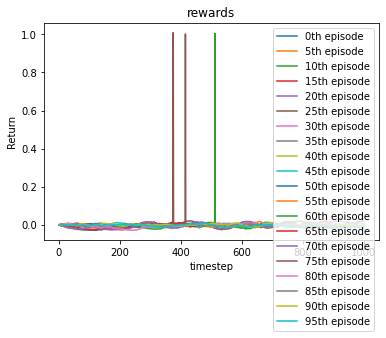

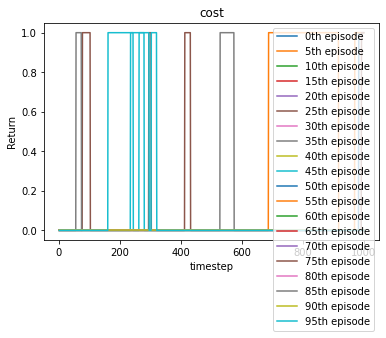

In [47]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

# Directory specified in script, not including date+time
log_dir = '/home/juliewang_jsw/handful-of-trials/data'

#safeOpt on Cost+Reward safety point goal 1 env
# filename = '2020-06-07--02:00:24/logs.mat'
# PE-TS with CEM on cost+Reward safety point goal 1 env
# filename = 'orig_pets_2020-06-09--06:17:31/logs.mat'
# PE-TS with CEM on cost+reward safety_point_goal_1, and pretrianing
# filename = '2020-06-10--06:54:10/logs.mat'
# Safeopt on cartpole
# filename = 'safeopt_cartpole_2020-06-11--06:43:35/logs.mat'
# safeopt on point goal
# filename = '2020-06-11--04:14:42/logs.mat'
# cem on point goal
filename = 'cem_pointgoal_2020-06-11--04:05:57/logs.mat'
# CEM on cartpole
# filename = 'cem_cartpole_2020-06-11--19:25:17/logs.mat'

data = loadmat(os.path.join(log_dir, filename))
avg_reward = np.mean(data['rewards'], axis=0)
N, task_horizon = data['rewards'].shape
print(f"{N} episodes,  each {task_horizon} long")

# Plot rewards and cost over time for a subsequent episdoes
for item in ['rewards', 'cost']:
    if len(data[item]) > 0:
        plt.figure()
        for i in range(0, N, 5):
            plt.plot(np.arange(1, task_horizon+1), data[item][i, :], label=f'{i}th episode')
        plt.title(item)
        plt.xlabel("timestep")
        plt.ylabel("Return")
        plt.legend()
        plt.show()


## Visualizing return vs. iteration
Ideally want to see the reward increasing as training proceeds

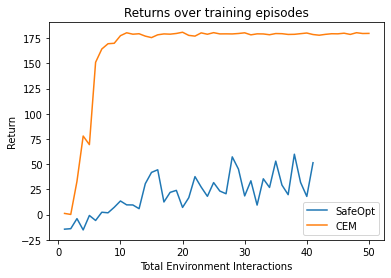

In [72]:

# safeopt on cartpole
filename = 'safeopt_cartpole_2020-06-11--06:43:35/logs.mat'
safeopt_data = loadmat(os.path.join(log_dir, filename))
# CEM on cartpole
filename = 'cem_cartpole_2020-06-11--19:25:17/logs.mat'
cem_data = loadmat(os.path.join(log_dir, filename))

for data in [safeopt_data, cem_data]:
    total_reward = data['returns'][0]
    episodes = len(total_reward)
    name = 'SafeOpt' if data == safeopt_data else 'CEM'
    plt.plot(np.arange(1, episodes+1), total_reward, label=name)
plt.title("Returns over training episodes")
plt.legend()
plt.xlabel("Total Environment Interactions")
plt.ylabel("Return")
plt.show()

In [ ]:

log_dir = '/home/juliewang_jsw/handful-of-trials/data'
# with pretraining
# filename = f'2020-06-11--22:32:02/train_iter{epoch}/predictions.mat'
# without pretraining
filename = f'2020-06-12--04:10:43/train_iter{epoch}/predictions.mat'
data = loadmat(os.path.join(log_dir, filename))
savedir = os.path.join(log_dir, 'NN_learning')

# Predictions for this timestep are 200 timesteps, 26 MPC predictions, 20 particles, 33 states
t, mpc_horizon, num_particles, state_space = data['predictions'].shape
t = [x for x in range(t)]
predicted_next_states = np.squeeze(data['predictions'][:, 1, :, :])
# the first element of MPC horizon is previous state
true_next_state = np.squeeze(data['predictions'][:, 0, 0, :])
for s in range(2):
    plt.figure()
    for i in range(num_particles):
        plt.plot(t, predicted_next_states[:, i, s])
    plt.plot(t, true_next_state[:, s], 'k', label='true')
    plt.xlabel('Total Environment Interations')
    plt.ylabel('Predicted next state')
    plt.title(f'Episode {epoch}, Predicted next state[{s}]')
    plt.legend()
    plt.show()
    plt.savefig(os.path.join(savedir, pltname))
    plt.close()



## Plotting NN learning over time
 

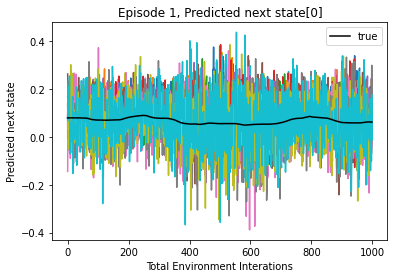

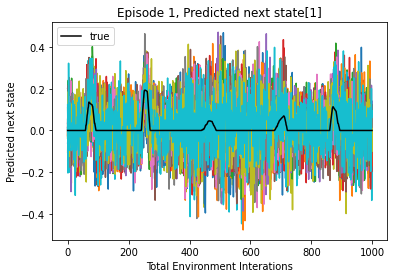

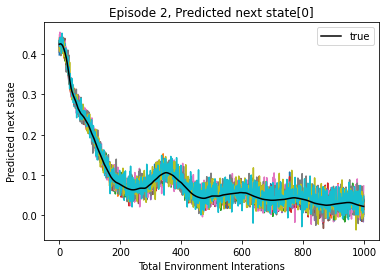

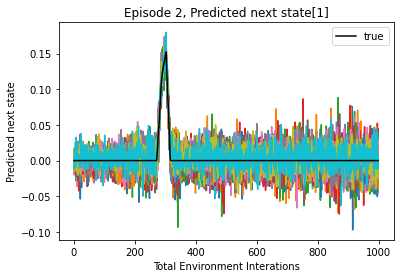

In [51]:

for epoch in [1, 2]:
    log_dir = '/home/juliewang_jsw/handful-of-trials/data'
    # with pretraining
    # filename = f'2020-06-11--22:32:02/train_iter{epoch}/predictions.mat'
    # without pretraining
    filename = f'2020-06-12--04:10:43/train_iter{epoch}/predictions.mat'
    data = loadmat(os.path.join(log_dir, filename))
    savedir = os.path.join(log_dir, 'NN_learning')

    # Predictions for this timestep are 200 timesteps, 26 MPC predictions, 20 particles, 33 states
    t, mpc_horizon, num_particles, state_space = data['predictions'].shape
    t = [x for x in range(t)]
    predicted_next_states = np.squeeze(data['predictions'][:, 1, :, :])
    # the first element of MPC horizon is previous state
    true_next_state = np.squeeze(data['predictions'][:, 0, 0, :])
    for s in range(2):
        plt.figure()
        for i in range(num_particles):
            plt.plot(t, predicted_next_states[:, i, s])
        plt.plot(t, true_next_state[:, s], 'k', label='true')
        plt.xlabel('Total Environment Interations')
        plt.ylabel('Predicted next state')
        plt.title(f'Episode {epoch}, Predicted next state[{s}]')
        pltname = f"episode_{epoch}_state_{s}.png"
        plt.legend()
        plt.show()
        plt.savefig(os.path.join(savedir, pltname))
        plt.close()

